In [5]:
import pandas as pd
import numpy as np

In [185]:
pwd

'C:\\Users\\Daksh\\Untitled Folder'

In [187]:
data=pd.read_html('https://www.worldometers.info/coronavirus/')

In [189]:
corona=data[0]

In [190]:
corona=corona.iloc[0:10]

In [191]:
corona=corona.fillna(0)

In [192]:
corona[corona['TotalCases']>2000]

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80849,25.0,3199.0,10.0,66914.0,10736,3226.0,56.2
1,Italy,21157,0.0,1441.0,0.0,1966.0,17750,1518.0,349.9
2,Iran,12729,0.0,611.0,0.0,4339.0,7779,0.0,151.5
3,S. Korea,8162,76.0,75.0,3.0,834.0,7253,59.0,159.2
4,Spain,6391,0.0,196.0,0.0,517.0,5678,272.0,136.7
5,Germany,4599,0.0,9.0,0.0,46.0,4544,9.0,54.9
6,France,4469,0.0,91.0,0.0,12.0,4366,300.0,68.5
7,USA,3044,101.0,60.0,3.0,56.0,2928,10.0,9.2


In [193]:
corona[corona['NewCases']>0]

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80849,25.0,3199.0,10.0,66914.0,10736,3226.0,56.2
3,S. Korea,8162,76.0,75.0,3.0,834.0,7253,59.0,159.2
7,USA,3044,101.0,60.0,3.0,56.0,2928,10.0,9.2


In [194]:
corona_by_country=corona.set_index('Country,Other')

In [195]:
corona_by_country

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
"Country,Other",,,,,,,,
China,80849,25.0,3199.0,10.0,66914.0,10736,3226.0,56.2
Italy,21157,0.0,1441.0,0.0,1966.0,17750,1518.0,349.9
Iran,12729,0.0,611.0,0.0,4339.0,7779,0.0,151.5
S. Korea,8162,76.0,75.0,3.0,834.0,7253,59.0,159.2
Spain,6391,0.0,196.0,0.0,517.0,5678,272.0,136.7
Germany,4599,0.0,9.0,0.0,46.0,4544,9.0,54.9
France,4469,0.0,91.0,0.0,12.0,4366,300.0,68.5
USA,3044,101.0,60.0,3.0,56.0,2928,10.0,9.2
Switzerland,1375,0.0,13.0,0.0,4.0,1358,0.0,158.9


In [196]:
corona_by_country.loc['Italy','ActiveCases']

17750

In [197]:
corona['Country,Other'].unique()[0]

'China'

In [198]:
data[0]['Country,Other'].nunique()

155

In [224]:
def find_slope(x,y,o0,o1):
    slope0=0
    slope1=0
    m=len(x)
   
    sum0=0
    sum1=0
    for i in range(0,len(x)):
        sum0+=(o0+o1*x[i]-y[i])
        sum1+=(o0+o1*x[i]-y[i])*x[i]
    slope0=sum0/m
    slope1=sum1/m
    return (slope0,slope1)

def linear_regression(x,y):
    o1=0
    o0=0
    a=0.001
    slope0,slope1=find_slope(x,y,o0,o1)
#     print(slope0,slope1)
    while (slope0>=0.01 or slope0<=-0.01) or (slope1>=0.01 or slope1<=-0.01):
        temp0=o0-a*slope0
        temp1=o1-a*slope1
        o0=temp0
        o1=temp1
        slope0,slope1=find_slope(x,y,o0,o1)
        
    temp0=o0-a*slope0
    temp1=o1-a*slope1
    o0=temp0
    o1=temp1
    print(slope0,slope1) 
    return (o0,o1)

In [225]:
corona

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop
0,China,80849,25.0,3199.0,10.0,66914.0,10736,3226.0,56.2
1,Italy,21157,0.0,1441.0,0.0,1966.0,17750,1518.0,349.9
2,Iran,12729,0.0,611.0,0.0,4339.0,7779,0.0,151.5
3,S. Korea,8162,76.0,75.0,3.0,834.0,7253,59.0,159.2
4,Spain,6391,0.0,196.0,0.0,517.0,5678,272.0,136.7
5,Germany,4599,0.0,9.0,0.0,46.0,4544,9.0,54.9
6,France,4469,0.0,91.0,0.0,12.0,4366,300.0,68.5
7,USA,3044,101.0,60.0,3.0,56.0,2928,10.0,9.2
8,Switzerland,1375,0.0,13.0,0.0,4.0,1358,0.0,158.9
9,UK,1140,0.0,21.0,0.0,18.0,1101,20.0,16.8


In [226]:
date=np.arange(0,54,2)

In [227]:
len(date)

27

In [228]:
cases=np.array([580,1317,2800,6058,9823,14553,20630,28266,34876,40553,45134,64438,69197,73332,75700,77673,79205,80828,83112,86604,90443,95314,102050,109991,118948,134576,156622])

In [229]:
cases=cases/1000

In [230]:
len(cases)

27

In [231]:
o0,o1=linear_regression(date,cases)

0.009998453566626134 -0.0002830564252252333


In [232]:
o0

-6.718906160254986

In [233]:
o1

2.6841928109979314

In [235]:
o0+o1*100

261.70037493953816

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

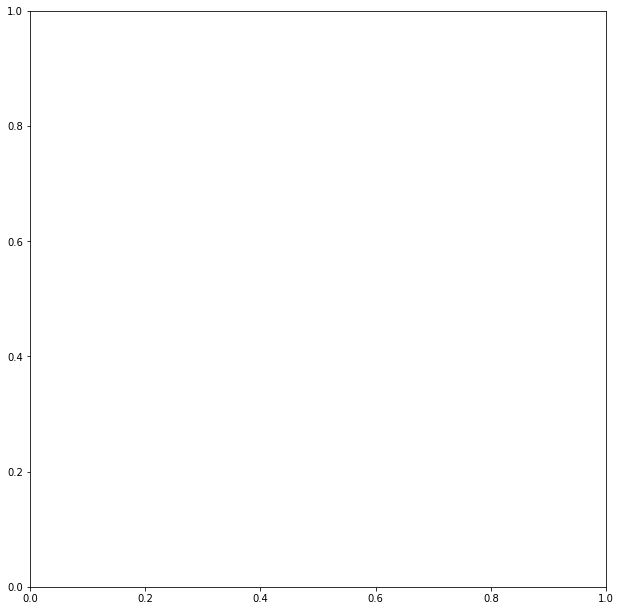

In [49]:
fig=plt.figure(figsize=(8,8))
axes=fig.add_axes([0,0,1,1])

In [50]:
list2=[i/1000 for i in [580,1317,2800,6058,9823,14553,20630,28266,34876,40553,45134,64438,69197,73332,75700,77673,79205,80828,83112,86604,90443,95314,102050,109991,118948,134576,156622]]
axes.plot(np.arange(0,54,2),list2)

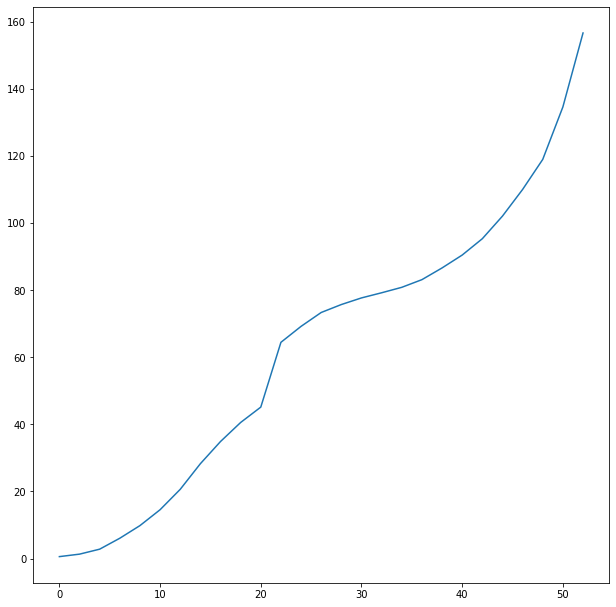

In [51]:
fig

In [52]:
list1=[(2.68*i-6.71) for i in np.arange(0,54,2)]

axes.plot(np.arange(0,54,2),list1)

In [46]:
list1

[-6.71,
 -1.3499999999999996,
 4.010000000000001,
 9.370000000000001,
 14.73,
 20.09,
 25.450000000000003,
 30.810000000000002,
 36.17,
 41.53,
 46.89,
 52.25,
 57.61000000000001,
 62.970000000000006,
 68.33000000000001,
 73.69000000000001,
 79.05000000000001,
 84.41000000000001,
 89.77000000000001,
 95.13000000000001,
 100.49000000000001,
 105.85000000000001,
 111.21000000000001,
 116.57000000000001,
 121.93000000000002,
 127.29,
 132.65]

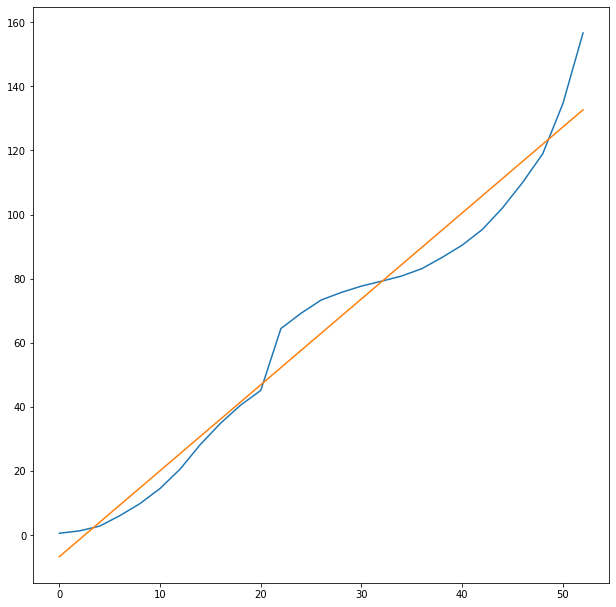

In [53]:
fig